<a href="https://colab.research.google.com/github/danielamador12/Projetos-Publicos/blob/master/Visualiza%C3%A7%C3%A3o_de_Fronteiras_da_%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão - Fronteiras
---
[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-danielamador12-darkblue.svg)](https://github.com/danielamador12)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkorange.svg)](https://medium.com/@daniel.s.amador)



Neste *notebook* **NÃO** trataremos sobre a teoria por trás das **Árvores de Decisão**, uma vez que essa teoria já foi abordada [aqui](https://bit.ly/2Guqmcd).

Aqui trataremos sobre **visualização de fronteiras**, ou seja, os *limites da decisão do algoritmo* para cada classe de nossa saída.

Vale a pena dizer que as fronteiras são bem visualizadas com dados numéricos, inclusive de forma gráfica e, existem bibliotecas que nos permitem fazer essa visualização.

![fronteira](https://www.h2foz.com.br/fl/822x549/36888-5eebad1f94534_puente.jpg?node_id=36888)

O dataset aqui utilizado é bastante utilizado por iniciantes no mundo de **Data Science** por sua *facilidade* e *simplicidade* em trabalhar e chegar a um resultado final sem passar por pré-processamentos como transformação de dados o balanceamento de classes. Também usamos esses mesmos dados com outros algoritmos e você pode visualizá-los nos links abaixo:
* [KMeans]( https://bit.ly/3cNfDG4)
* [KNN](https://bit.ly/34vtr4v)
* [SVM](https://bit.ly/3iiWnS4)
> Observação: O *dataset* também pode ser utilizados com outros algoritmos como Regressão Linear ou Logística, por exemplo.

O *dataset* foi retirado diretamente da *API*  da biblioteca **scikit learn** e pode ser visualizado [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

## Sobre o projeto

A ideia é utilizar essa base simples para trazer à tona a compreensão de como o algoritmo vai tomando suas decisões. Como entraremos no que eu chamaria de "**baixo nível**", ou seja, entramos no escopo que em uma análise não é tão comum entrar, logo meu conselho é que, não tente se ater demais aos códigos, pois focamos aqui na visualização das regras bem como das fronteiras para classificação.


## Checklist

1. Definição do Problema 
2. Obtenção dos Dados e Machine Learning
3. Validação
4. Visualização
5. Navegando na estrutura de uma árvore de decisão
6. Visualizando fronteiras


# 1. Definição do Problema 

No "problema" temos uma base de dados de flores do ***tipo* Iris**, sendo elas:
* Iris setosa
* Iris versicolor
* Iris virginica

E são divididas nas seguintes **características**:
* sepal length (cm) - comprimento da Sépala
*     sepal width (cm) - largura da Sépala
*    petal length (cm) - comprimento da Pétala
*     petal width (cm) - altura da Pétala

**Pétala** é a parte interna da flor e é aquela parte da flor que chama nossa atenção por ser colorida e frágil. Dentre suas funções, ela serve para atrair os polinizadores.
**Sépala** é a parte mais externa da flor e são, normalmente, menores e mais rigidas ou consistentes que as pétalas, servindo para protegê-las e fechando sobre elas com o intuito de proteção quando na antese, ou seja, no momento de maturação de uma flor.

Esses detalhes servem apenas para conhecimento do que a gente vai trabalhar, mas para hoje não precisamos aprofundar mais que isso.

### A grande questão
Será que temos como, apenas com essas quatro características classificar cada tipo de árvore?

Sim, é possível, contudo não é esse o nosso foco hoje, por isso passaremos de forma rápida por isso, chegando ao final na parte de **visualização de fronteiras** e como o algoritmo **decidiu** para **classificar**.


# 2. Obtenção dos Dados e Machine Learning

**Importação das bibliotecas**

In [ ]:
from sklearn.tree import export_graphviz # para exportar gráficos
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

**Carregando a base de dados**

In [ ]:
iris = load_iris()

In [ ]:
# formato series é só pra melhorar a visualização da saida
pd.Series(iris.feature_names),pd.Series(iris.target_names)

(0    sepal length (cm)
 1     sepal width (cm)
 2    petal length (cm)
 3     petal width (cm)
 dtype: object,
 0        setosa
 1    versicolor
 2     virginica
 dtype: object)

In [ ]:
# dados
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Divisão dos Dados**

Dividindo os dados em treino e teste em 70/30

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

**Verificando os shapes de X**

In [ ]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

**Verificando os shapes de y**

In [ ]:
y_train.shape,y_test.shape

((105,), (45,))

### Machine Learning 

**Instanciando o objeto classificador**

In [ ]:
clf = tree.DecisionTreeClassifier()

**Treinando a árvore e verificando as features mais importantes**

In [ ]:
# treinando a árvore
clf = clf.fit(X_train,y_train)
# verificando features mais importantes para o modelo
clf.feature_importances_

array([0.01908397, 0.02271901, 0.93638677, 0.02181025])

**Função para visualizar para cada classe**

In [ ]:
for feature,importancia in zip(iris.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia.round(4)))
# pode ser sem o round(4)

sepal length (cm):0.0191
sepal width (cm):0.0227
petal length (cm):0.9364
petal width (cm):0.0218


**Predizendo o conjunto de teste**

In [ ]:
resultado=clf.predict(X_test)
print(resultado)

[0 1 1 1 1 2 2 0 2 0 2 1 0 1 2 1 1 1 2 1 1 2 2 2 1 2 2 1 0 0 2 0 1 0 2 2 0
 0 1 1 0 2 1 2 0]


**Testando nova amostra**

In [ ]:
test=np.array([[5.1,3.5,1.4,0.2]])
clf.predict(test)

array([0])

**Verificando a probabilidade por classe**

In [ ]:
print(clf.predict_proba(test))

[[1. 0. 0.]]


# 3. Validação

**Métricas**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        17
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Em tese, nosso modelo está muito bom, veja que a acertividade está em quase 100%, contudo para podermos saber se os dados não estão **sobreajustados**, também temos que testar o modelo com os dados de teste, os próprios dados de treino e novas amostras para saber como se sai o algoritmo.

Aqui não estamos focando na parte de overfitting ou algo do tipo, mas caso você esteja com curiosidade, pode ver nesse [notebook](https://bit.ly/2Guqmcd) em seu terceiro tópico `3. max_depth em Ação` o modelo enviesado inicialmente, depois deixando de ser *enviesado* para estar dentro dos parâmetros "usáveis" e depois indo para um *overfitting*.

# 4. Visualização
Disponibilização do código feita pela própria **Scikit Learn** para visualizar a árvore. Veja como é fácil encontrar as *regras* da árvores de decisão. 

**Importações**

In [ ]:
import pydot # para visualização da árvore de decisão
import graphviz # biblioteca para plotar diagramas (gráficos)
from ipywidgets import interactive # para utilização de widgets interativos

**Visualizando de forma gráfica a árvore gerada**

O `tree.export_graphviz` foi importado com *from sklearn.tree* **import** *export_graphviz*.

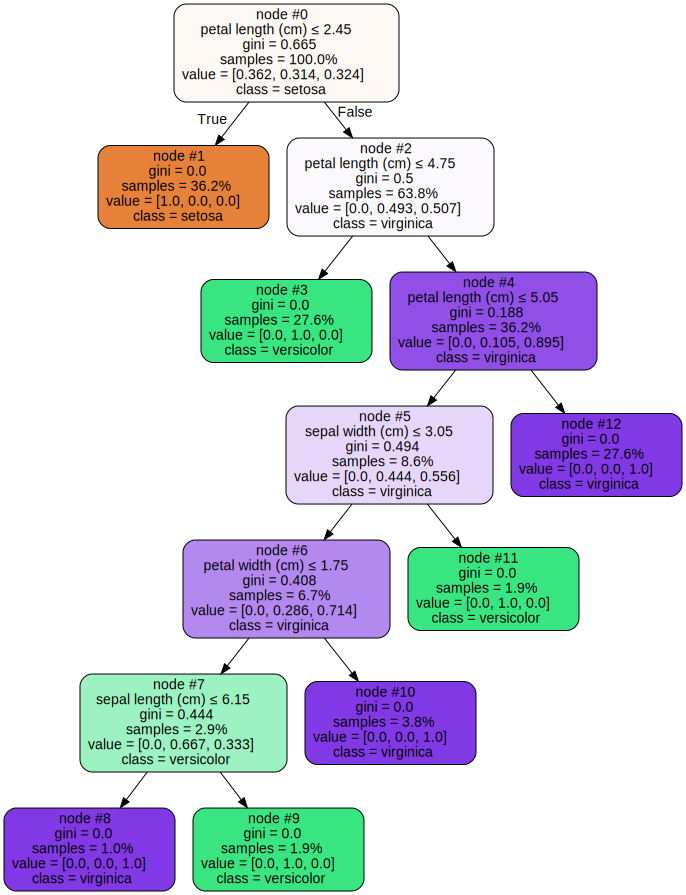

In [ ]:
dot_data = tree.export_graphviz( # os parâmetros abaixo
         clf, # o modelo em si
         out_file=None, # se quer gerar um arquivo externo
         feature_names=iris.feature_names, # features da bd
         class_names=iris.target_names,  # classes da bd
         filled=True, rounded=True, # se quer preencher e arredondar as caixas
         proportion=True, 
         node_ids=True, # para saber o id de cada nó
         rotate=False,# se True vai gerar na horizontal
         label='all', # quais colunas mostrar
         special_characters=True # se houver, imprime
        )  
graph = graphviz.Source(dot_data) 
graph

**O código abaixo serve para você salvar a imagem, caso queira.**

In [ ]:
# salvando em pdf e png

# pdf
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_pdf("iris.pdf") 

# png
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png("iris.png")

### Renderizando de forma interativa

Aqui você poderá, de forma interativa, alterar os parâmetros e ver a árvore sendo gerada com base no que você for alterando.

**Bibliotecas para renderizar a árvore de forma interativa**

In [ ]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

**Função para renderizar**

In [ ]:
# load dataset
data = load_iris() # carregando o dataset

# feature matrix
X = data.data # features

# target vector
y = data.target # classes

# feature labels
features_label = data.feature_names # nome das features

# class label
class_label = data.target_names # nome das classes


def plot_tree(crit, split, depth, min_split, min_leaf=0.2): # criando função e passando nome das caixas
    estimator = tree.DecisionTreeClassifier( # instanciando clf
           random_state = 0 
          ,criterion = crit # cada valor recebido na função será o valor recebido por cada um
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_split
          ,min_samples_leaf=min_leaf # até aqui
    )

    estimator.fit(X, y) # treinando o clf
    graph = Source(tree.export_graphviz(estimator # passando o clf para renderizar para o graphviz
      , out_file=None # passando os parâmetros do export
      , feature_names=features_label
      , class_names=class_label
      , filled = True))
    display(SVG(graph.pipe(format='svg'))) # fazendo a exibição
    return estimator # retornando o estimator

inter=interactive(plot_tree # passando para o widgety os valores de cada caixa
   , crit = ["gini", "entropy"] # cada valor aqui aparecerá na função do clf
   , split = ["best", "random"]
   , depth=[1,2,3,4,5]
   , min_split=(0.1,1) # tupla de inicio e fim
   , min_leaf=(0.1,0.5)) # aqui também

display(inter) # renderizar

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Aqui, é legal você baixar esse arquivo **.ipynb** e rodar em sua máquina ou nuvem, como o [**Google Colab**](https://colab.research.google.com/notebooks/intro.ipynb#recent=true) para poder alterar interativamente os parâmetros e ver a árvore sendo criada.

Se você estiver visualizando no **GitHub**, você não estará vendo porque a plataforma não consegue renderizar, o que reforça meu conselho para você baixar e rodar o código.

# 5. Navegando na estrutura de uma árvore de decisão
Aqui será criada uma função para extrair as regras das árvores.

**Carregando e dividindo os dados**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Instanciando o classificador e treinando**

In [ ]:
# instanciando o classificador
estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
# treinando o modelo
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

**Visualizando alguns atributos da árvore através do `estimator.tree_`**

Tem vários outros!

In [ ]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

**Visualizando**

In [ ]:
print("Número de nós: {}".format(n_nodes))
print("Indices a esquerda: {}".format(children_left))
print("Indices a direita: {}".format(children_right))
print("Feature: {}".format(feature))
print("Limite (threshold: {}".format(threshold))

Número de nós: 5
Indices a esquerda: [ 1 -1  3 -1 -1]
Indices a direita: [ 2 -1  4 -1 -1]
Feature: [ 3 -2  2 -2 -2]
Limite (threshold: [ 0.80000001 -2.          4.95000005 -2.         -2.        ]


**No código abaixo**:

* Observação: o n_nodes é o estimator.tree_.node_count que é a contagem de nós, assim como o threshold etc.

* O próprio site da sklearn tem esse código

In [ ]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64) # instanciando uma nova estrutura de zeros do tamanho dos nós do tipo float
is_leaves = np.zeros(shape=n_nodes, dtype=bool) # instanciando uma nova estrutura de zeros do tamanho dos nós do tipo booleano
stack = [(0, -1)]
while len(stack) > 0:# laço em todos os nós para verificar se é nó folha ou não
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes) # impressão com o valor de profundidade
for i in range(n_nodes): # laço percorrendo cada nó
    if is_leaves[i]: # verifica se o nó é folha ou não
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else: # se folha, imprime a classe, se não folha, percorre outro nó para verificação
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 iris.feature_names[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 5 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo petal width (cm) <= 0.800000011920929 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó teste): vai para o nó 3 se o valor do atributo petal length (cm) <= 4.950000047683716 
 se não, vai para o nó 4.
		nó=3 (nó folha).
		nó=4 (nó folha).


**Extraindo regras da árvore gerada a partir de uma determinada amostra do conjunto de teste `X_test`**

O próprio site da sklearn tem esse código.


In [ ]:
def extrai_regras(sample_id): # atrvés do id da árvore
    node_indicator = estimator.decision_path(X_test) # indicadores do caminho de decisão nas features de teste

    leave_id = estimator.apply(X_test) # aplicando os dados de teste à árvore e armazena os id's do nivel folha (retorno do apply)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]: # verificação dos indices armazenados
                                        node_indicator.indptr[sample_id + 1]]

    print('\nRegras usadas para predizer a amostra %s' % (sample_id)) # imprime qual o valor da amostra

    for f,v in zip(iris.feature_names,X_test[sample_id]): # pega o nome das features dos e os id's do teste
        print('%s = %s'%(f,v)) # imprime para cada feature e cada valor

    print('\n')      
    for node_id in node_index: # se folha, imprime, se nao continua
        if leave_id[sample_id] == node_id:
            continue

        if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)" # imprime a regra gerada
              % (node_id, # id do nós de decisão
                 iris.feature_names[node_id], # nome da feature
                 X_test[sample_id, feature[node_id]],# a partir do dado de teste qual o valor
                 threshold_sign, # sinal do threshold
                 threshold[node_id])) # valor do threshold
    pred =estimator.predict(X_test[sample_id].reshape(1, -1)) # após predizer
    print("\tClasse => %s" %iris.target_names[pred]) # qual classe foi atribuida

**Chamando a função `extrai_regras()`**

Aqui, você pode passar quantos **samples** quiser e será visualizada a regra para predizer cada amostra.

Temos 38 samples (0 ao 37)

In [ ]:
extrai_regras(1) #nº do sample (sample_id)


Regras usadas para predizer a amostra 1
sepal length (cm) = 6.0
sepal width (cm) = 2.2
petal length (cm) = 4.0
petal width (cm) = 1.0


id do nó de decisão 0 : (atributo sepal length (cm) com valor = 1.0 > 0.800000011920929)
id do nó de decisão 2 : (atributo petal length (cm) com valor = 4.0 <= 4.950000047683716)
	Classe => ['versicolor']


In [ ]:
# extraindo da última amostra
extrai_regras(37)


Regras usadas para predizer a amostra 37
sepal length (cm) = 6.0
sepal width (cm) = 2.7
petal length (cm) = 5.1
petal width (cm) = 1.6


id do nó de decisão 0 : (atributo sepal length (cm) com valor = 1.6 > 0.800000011920929)
id do nó de decisão 2 : (atributo petal length (cm) com valor = 5.1 > 4.950000047683716)
	Classe => ['virginica']


# 6. Visualizando fronteiras

**Entendendo o parâmetro `min_samples_split`**

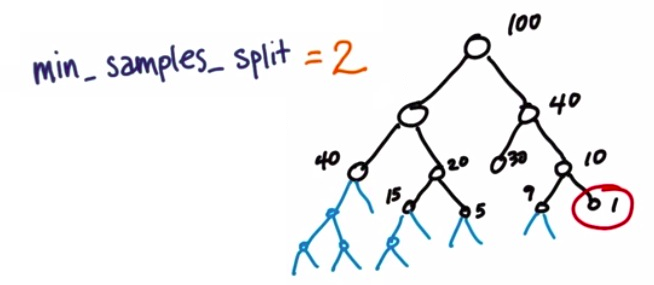

In [ ]:
from IPython.display import Image
Image(filename ='/home/amador/Pictures/min-samples-split.png', width=500, height=500)
# somente os nós que tiverem pelo menos 2 abaixo dele serão utilizados para fazer a divisão da árvore

Como falado [aqui](https://bit.ly/2Guqmcd), o **min_samples_split** serve para alterar o número de amostras mínimas para considerar um nó para divisão.

Na figura acima, o **min_samples_split** é igual a **2**, logo no circulo vermelho é igual a **1** e finaliza ali, ou seja, o nó não é considerado para divisão.

**Importações**

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

**Função para visualizar fronteiras**

In [ ]:
def visualize_fronteiras(msamples_split): # função que recebe por parâmetro o número de samples_split
    X = iris.data[:, [0, 2]] # instanciando X
    y = iris.target # instanciando y

    clf = DecisionTreeClassifier(min_samples_split=msamples_split) # criando classificador com o parâmetro passado para o min_samples_split
    tree = clf.fit(X, y) # treinando o algoritmo

    plt.figure(figsize=(8,5)) # criando figura com o matplotlib
    plot_decision_regions(X, y, clf=tree, legend=2) # passando os dados de X e y, classificador e a legenda para o plot

    plt.xlabel('sepal length [cm]') # legenda x
    plt.ylabel('petal length [cm]') # leganda y
    plt.title('Decision Tree on Iris') # titulo
    plt.show()

**Nas duas visualizações abaixos temos:**
* Com **2 msamples_split** um modelo muito complexo, logo muito ajustado aos dados.
* Com **10 msamples_split** um modelo mais simples, sem muito contorno. Aqui percebe-se inclusive alguns erros, isso acontece porque o modelo consegue generalizar os dados sem ser fraco demais ou estar ajustado demais, ou seja, é ideal e, quando chegarem novos modelos, não irá sofrer para classificar.

**Chamando a função `visualize_fronteiras`**

/home/amador/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


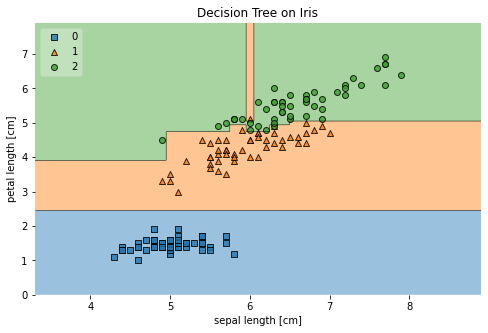

In [ ]:
visualize_fronteiras(2) # modelo complexo e muito ajustado, cheia de contornos

/home/amador/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


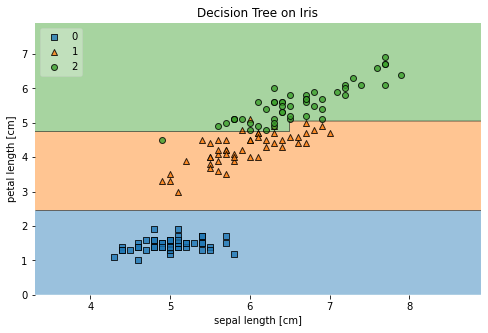

In [ ]:
visualize_fronteiras(10) # modelo menos complexo, menos ajustado. Passa apenas faxas simples, logo em um dado novo conseguirá generalizar melhor

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/danielamador12/Portfolio/blob/master/README.md).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-danielamador12-darkblue.svg)](https://github.com/danielamador12)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkorange.svg)](https://medium.com/@daniel.s.amador)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>